In [1]:
from __future__ import annotations

import logging
import os
import sys
from itertools import product
from pathlib import Path
from typing import Dict, List, Optional, Sequence, Tuple, Union

import IPython
import matplotlib
import matplotlib.colors
import matplotlib.pyplot as plt
import numpy as np
import optuna
import pandas as pd
import seaborn as sns
from matplotlib.patches import Rectangle
from matplotlib.scale import ScaleBase
from seaborn._statistics import LetterValues
from sklearn.metrics import r2_score
from sklearn.preprocessing import RobustScaler

NOTEBOOK_PATH: Path = Path(IPython.extract_module_locals()[1]["__vsc_ipynb_file__"])
PROJECT_DIR: Path = NOTEBOOK_PATH.parent.parent
sys.path.append(str(PROJECT_DIR))
import src.utils.custom_log as custom_log
import src.utils.json_util as json_util
from src._StandardNames import StandardNames
from src.utils.PathChecker import PathChecker
from src.utils.set_rcparams import set_rcparams

os.chdir(PROJECT_DIR)
set_rcparams()

LOG: logging.Logger = logging.getLogger(__name__)
custom_log.init_logger(log_lvl=logging.INFO)
LOG.info("Log start, project directory is %s (exist: %s)", PROJECT_DIR, PROJECT_DIR.is_dir())

CHECK: PathChecker = PathChecker()
STR: StandardNames = StandardNames()

FULL_WIDTH: float = 448.13095 / 72 - 0.2

FIG_DIR: Path = CHECK.check_directory(PROJECT_DIR / "reports" / "figures", exit=False)
FIG_DIR /= NOTEBOOK_PATH.stem
FIG_DIR.mkdir(parents=True, exist_ok=True)
LOG.info("Figure directory is %s (exist: %s)", FIG_DIR, FIG_DIR.is_dir())

2025-01-05 09:52:49,640     INFO  MainProcess  MainThread Log start, project directory is /root/py_projects/aihiii (exist: True)
2025-01-05 09:52:49,641     INFO  MainProcess  MainThread Directory '/root/py_projects/aihiii/reports/figures' exists
2025-01-05 09:52:49,642     INFO  MainProcess  MainThread Figure directory is /root/py_projects/aihiii/reports/figures/eval_cnn_optuna_2 (exist: True)


In [2]:
EXP_DIR: Path = CHECK.check_directory(
    PROJECT_DIR / "experiments" / "2024-11-10-21-13-00_pure_cnn_optuna_doe_sobol_20240705_194200", exit=False
)

2025-01-05 09:52:49,651     INFO  MainProcess  MainThread Directory '/root/py_projects/aihiii/experiments/2024-11-10-21-13-00_pure_cnn_optuna_doe_sobol_20240705_194200' exists


In [6]:
COLORS: sns.palettes._ColorPalette = sns.color_palette()
COLORS

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [3]:
def read_study():
    study: pd.DataFrame = optuna.load_study(
        study_name="AnnUniversalPureKeras", storage=f"sqlite:///{EXP_DIR.absolute() / 'study.sqlite3'}"
    ).trials_dataframe()
    study.set_index("number", inplace=True)
    study = study[study["state"].eq("COMPLETE")]
    rel_cols = sorted([col for col in study.columns if "params" in col or col == "value"])
    study.fillna(False, inplace=True)

    return study[rel_cols].copy()


TRIALS: pd.DataFrame = read_study()
TRIALS

/tmp/ipykernel_669076/73984878.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  study.fillna(False, inplace=True)
/tmp/ipykernel_669076/73984878.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  study.fillna(False, inplace=True)


,params_03CHST0000OCCUACXD,params_03CHST0000OCCUACYD,params_03CHST0000OCCUACZD,params_03CHST0000OCCUDSXD,params_03CHSTLOC0OCCUDSXD,params_03CHSTLOC0OCCUDSYD,params_03CHSTLOC0OCCUDSZD,params_03FEMRLE00OCCUFOZD,params_03FEMRRI00OCCUFOZD,params_03HEAD0000OCCUACXD,...,params_n_filters_3_0,params_n_filters_3_1,params_n_filters_3_2,params_n_filters_3_3,params_pooling_size,params_pooling_strategy,params_share_dense,params_spatial_dropout_rate,params_temporal_feature_n_tsps,value
number,,,,,,,,,,,,,,,,,,,,,
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,1,False,False,0.793148
1,False,False,True,False,True,False,True,True,False,False,...,60.0,80.0,70.0,100.0,2.0,average,1,False,1400.0,0.871907
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,0,False,False,0.782855
3,False,False,True,True,True,False,True,False,True,False,...,False,False,False,False,4.0,max,1,0.278903,140.0,0.890178
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,0,False,False,0.682863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,0,False,False,0.775227
199,True,False,True,True,True,False,False,False,False,False,...,False,False,False,False,5.0,average,0,0.391146,140.0,0.904497
200,True,False,True,True,True,False,False,False,False,False,...,False,False,False,False,5.0,average,0,0.367646,140.0,0.904374


In [4]:
TRIALS["value"].describe()

count    202.000000
mean       0.891048
std        0.036148
min        0.682863
25%        0.898202
50%        0.903644
75%        0.904402
max        0.905131
Name: value, dtype: float64

In [5]:
TRIALS.nlargest(20, "value")[
    [
        "params_kernel_size_0_0",
        "params_kernel_size_1_0",
        "params_kernel_size_2_0",
    ]
]

,params_kernel_size_0_0,params_kernel_size_1_0,params_kernel_size_2_0
number,,,
135,41.0,41.0,11.0
149,41.0,41.0,11.0
134,41.0,41.0,11.0
131,41.0,41.0,11.0
137,41.0,41.0,11.0
164,41.0,41.0,11.0
173,41.0,41.0,11.0
177,41.0,41.0,11.0
136,41.0,41.0,11.0


In [6]:
TRIALS[TRIALS["value"].ge(TRIALS["value"].max() - 4e-3)]

,params_03CHST0000OCCUACXD,params_03CHST0000OCCUACYD,params_03CHST0000OCCUACZD,params_03CHST0000OCCUDSXD,params_03CHSTLOC0OCCUDSXD,params_03CHSTLOC0OCCUDSYD,params_03CHSTLOC0OCCUDSZD,params_03FEMRLE00OCCUFOZD,params_03FEMRRI00OCCUFOZD,params_03HEAD0000OCCUACXD,...,params_n_filters_3_0,params_n_filters_3_1,params_n_filters_3_2,params_n_filters_3_3,params_pooling_size,params_pooling_strategy,params_share_dense,params_spatial_dropout_rate,params_temporal_feature_n_tsps,value
number,,,,,,,,,,,,,,,,,,,,,
21,False,False,False,True,False,True,True,True,False,True,...,False,False,False,False,4.0,average,1,0.197579,70.0,0.901296
23,False,False,False,True,False,True,True,True,False,True,...,False,False,False,False,3.0,average,1,0.178087,70.0,0.901714
25,True,True,False,False,False,True,False,False,False,True,...,False,False,False,False,3.0,average,1,0.177094,70.0,0.902171
26,False,False,False,True,False,True,True,True,False,True,...,False,False,False,False,2.0,average,1,0.159325,70.0,0.901757
31,False,False,False,True,False,True,True,True,False,True,...,False,False,False,False,3.0,average,1,0.493696,70.0,0.901919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,True,False,True,True,True,False,False,False,False,False,...,False,False,False,False,5.0,average,0,0.345105,140.0,0.904580
196,True,False,True,True,True,False,False,False,False,False,...,False,False,False,False,5.0,average,0,0.351206,140.0,0.904409
199,True,False,True,True,True,False,False,False,False,False,...,False,False,False,False,5.0,average,0,0.391146,140.0,0.904497


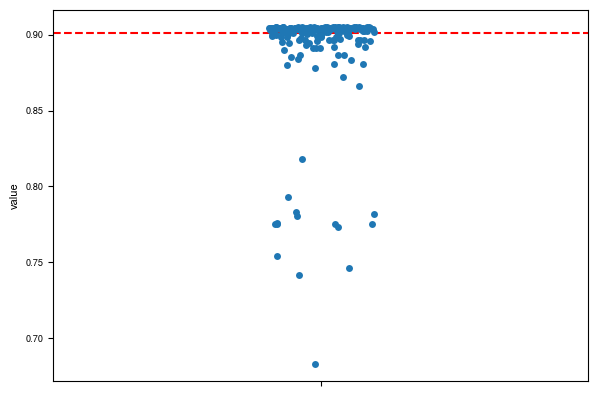

In [7]:
fig, ax = plt.subplots(figsize=(FULL_WIDTH, 4))
sns.stripplot(TRIALS["value"], ax=ax)
ax.axhline(TRIALS["value"].max() - 4e-3, color="red", linestyle="--")

2024-12-20 18:52:22,277     INFO  MainProcess  MainThread maxp pruned
2024-12-20 18:52:22,284     INFO  MainProcess  MainThread cmap pruned
2024-12-20 18:52:22,285     INFO  MainProcess  MainThread post pruned
2024-12-20 18:52:22,287     INFO  MainProcess  MainThread CFF  pruned
2024-12-20 18:52:22,291     INFO  MainProcess  MainThread GPOS pruned
2024-12-20 18:52:22,299     INFO  MainProcess  MainThread GSUB pruned
2024-12-20 18:52:22,300     INFO  MainProcess  MainThread Added .notdef to subset
2024-12-20 18:52:22,301     INFO  MainProcess  MainThread Closing glyph list over 'GSUB': 27 glyphs before
2024-12-20 18:52:22,302     INFO  MainProcess  MainThread Glyph names: ['.notdef', 'D', 'F', 'R', 'b', 'c', 'e', 'f', 'five', 'four', 'i', 'n', 'nine', 'o', 'one', 'period', 'q', 'r', 's', 'seven', 'space', 't', 'three', 'two', 'u', 'y', 'zero']
2024-12-20 18:52:22,302     INFO  MainProcess  MainThread Glyph IDs:   [0, 36, 44, 47, 51, 55, 56, 57, 58, 67, 78, 79, 82, 83, 89, 92, 96, 97, 99

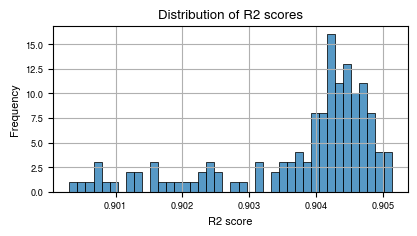

In [8]:
def make_hist(thres=0.9):
    fig, ax = plt.subplots(figsize=(0.7 * FULL_WIDTH, 0.4 * FULL_WIDTH))
    sns.histplot(TRIALS["value"][TRIALS["value"].ge(thres)], ax=ax, bins=40)
    ax.set_title("Distribution of R2 scores")
    ax.set_xlabel("R2 score")
    ax.set_ylabel("Frequency")
    ax.grid()
    fig.savefig(FIG_DIR / "r2_hist.pdf")


make_hist()

In [9]:
def get_uniques(thres=0.9045):
    idx = TRIALS[TRIALS["value"].ge(thres)].index
    print(len(idx))
    for col in TRIALS.columns:
        if "params" in col:
            print(col, f"{len(TRIALS.loc[idx, col].unique())}/{len(TRIALS[col].unique())}", sorted(TRIALS.loc[idx, col].unique()))


get_uniques()

40
params_03CHST0000OCCUACXD 2/2 [False, True]
params_03CHST0000OCCUACYD 1/2 [False]
params_03CHST0000OCCUACZD 2/2 [False, True]
params_03CHST0000OCCUDSXD 1/2 [True]
params_03CHSTLOC0OCCUDSXD 2/2 [False, True]
params_03CHSTLOC0OCCUDSYD 2/2 [False, True]
params_03CHSTLOC0OCCUDSZD 2/2 [False, True]
params_03FEMRLE00OCCUFOZD 2/2 [False, True]
params_03FEMRRI00OCCUFOZD 1/2 [False]
params_03HEAD0000OCCUACXD 2/2 [False, True]
params_03HEAD0000OCCUACYD 1/2 [False]
params_03HEAD0000OCCUACZD 1/2 [True]
params_03HEADLOC0OCCUDSXD 1/2 [True]
params_03HEADLOC0OCCUDSYD 1/2 [True]
params_03HEADLOC0OCCUDSZD 2/2 [False, True]
params_03NECKUP00OCCUFOXD 1/2 [True]
params_03NECKUP00OCCUFOZD 1/2 [True]
params_03NECKUP00OCCUMOYD 2/2 [False, True]
params_03PELV0000OCCUACXD 1/2 [False]
params_03PELV0000OCCUACYD 1/2 [True]
params_03PELV0000OCCUACZD 1/2 [True]
params_03PELVLOC0OCCUDSXD 1/2 [True]
params_03PELVLOC0OCCUDSYD 1/2 [True]
params_03PELVLOC0OCCUDSZD 1/2 [True]
params_Chest_Deflection 2/2 [False, True]


In [5]:
IGNORE: List[str] = [
    "params_03CHST0000OCCUACXD",
    "params_03CHST0000OCCUACYD",
    "params_03CHST0000OCCUACZD",
    "params_03CHST0000OCCUDSXD",
    "params_03CHSTLOC0OCCUDSXD",
    "params_03CHSTLOC0OCCUDSYD",
    "params_03CHSTLOC0OCCUDSZD",
    "params_03FEMRLE00OCCUFOZD",
    "params_03FEMRRI00OCCUFOZD",
    "params_03HEAD0000OCCUACXD",
    "params_03HEAD0000OCCUACYD",
    "params_03HEAD0000OCCUACZD",
    "params_03HEADLOC0OCCUDSXD",
    "params_03HEADLOC0OCCUDSYD",
    "params_03HEADLOC0OCCUDSZD",
    "params_03NECKUP00OCCUFOXD",
    "params_03NECKUP00OCCUFOZD",
    "params_03NECKUP00OCCUMOYD",
    "params_03PELV0000OCCUACXD",
    "params_03PELV0000OCCUACYD",
    "params_03PELV0000OCCUACZD",
    "params_03PELVLOC0OCCUDSXD",
    "params_03PELVLOC0OCCUDSYD",
    "params_03PELVLOC0OCCUDSZD",
    "params_Chest_Deflection",
    "params_Chest_VC",
    "params_Chest_a3ms",
    "params_Femur_Fz_Max_Compression",
    "params_Femur_Fz_Max_Tension",
    "params_Head_HIC15",
    "params_Head_a3ms",
    "params_Neck_Fx_Shear_Max",
    "params_Neck_Fz_Max_Compression",
    "params_Neck_Fz_Max_Tension",
    "params_Neck_My_Extension",
    "params_Neck_My_Flexion",
    "params_Neck_Nij",
    "params_kernel_size_0_0",
    "params_kernel_size_0_1",
    "params_kernel_size_0_2",
    "params_kernel_size_0_3",
    "params_kernel_size_1_0",
    "params_kernel_size_1_1",
    "params_kernel_size_1_2",
    "params_kernel_size_1_3",
    "params_kernel_size_2_0",
    "params_kernel_size_2_1",
    "params_kernel_size_2_2",
    "params_kernel_size_2_3",
    "params_kernel_size_3_0",
    "params_kernel_size_3_1",
    "params_kernel_size_3_2",
    "params_kernel_size_3_3",
    "params_n_filters_0_0",
    "params_n_filters_0_1",
    "params_n_filters_0_2",
    "params_n_filters_0_3",
    "params_n_filters_1_0",
    "params_n_filters_1_1",
    "params_n_filters_1_2",
    "params_n_filters_1_3",
    "params_n_filters_2_0",
    "params_n_filters_2_1",
    "params_n_filters_2_2",
    "params_n_filters_2_3",
    "params_n_filters_3_0",
    "params_n_filters_3_1",
    "params_n_filters_3_2",
    "params_n_filters_3_3",
]

In [11]:
def plot_parcoords(
    values: Union[Sequence, np.ndarray],
    labels: Union[Sequence[str], np.ndarray[str]] = None,
    title: str = None,
    color_field: Union[str, int] = None,
    colors=["red", "grey", "green", "black"],
    c_thres=[0.85, 0.905, 1],
    scale: Union[
        Sequence[Tuple[Union[str, int], Union[str, ScaleBase]]],
        Sequence[Union[str, ScaleBase]],
        str,
    ] = None,
    figsize: Tuple[int, int] = None,
    y_limits: Union[Sequence, np.ndarray] = None,
    axs: np.ndarray[plt.Axes] = None,
) -> Tuple[plt.Figure, np.ndarray[plt.Axes]]:
    """Plotting function for parallel coordinate plots.
    Adapted from https://github.com/VoigtPeter/parcoords.git

    :param values: 2-dimensional sequence or numpy-array containing
        row-vectors of the data to display. (required)
    :param labels: Sequence containing the column labels. (optional)
    :param title: Title of the figure. (optional)
    :param color_field: Either the label of the column (`labels` must be provided)
        or the column index used as basis for the coloring. If not
        provided, the `color` attribute will be used. (optional)
    :param color: Color of the edges when `color_field` attribute is not provided.
        (default: grey)
    :param scale: Sequence of scale types. Must be in one of the forms:
        [({field label/index}, {"linear", "log", ...}), ...] or
        [{"linear", "log", ...}, ...] or
        {"linear", "log", ...}.
        (optional, default: linear)
    :param figsize: Size of the figure. (optional)
    :param y_limits: The min- & max-limits for the axes. Must be in the form of:
        [(`min`, `max`), ...] for all axes. (optional)
    :param axs: An existing axes array, to be used when adding more datapoints.
        (optional)
    :return: The figure object and the axes (as ndarray).
    """
    # transpose row-vector to column-vector
    if not isinstance(values, np.ndarray):
        values = np.array(values, dtype="object")
    values = values.T

    no_of_cols = len(values)
    if axs is None:
        # initialize figure and axes
        fig, axs = plt.subplots(
            1,
            no_of_cols - 1,
            sharey="none",
            gridspec_kw=dict(wspace=0),
        )
        axs = np.append(axs, axs[-1].twinx())

        # calculate limits from data & transform nominal columns
        ylims = []
        for i, (column, ax) in enumerate(zip(values, axs)):
            if not all(isinstance(item, (int, float)) for item in column):
                mappings, column = np.unique(column, return_inverse=True)
                values[i] = column
                ax.set_yticks(
                    range(len(mappings)),
                    labels=mappings,
                )
            if y_limits is None:
                smallest = column.min(axis=0)
                largest = column.max(axis=0)
                ylims.append([smallest, largest])

        if y_limits is None:
            y_limits = ylims

    else:
        for i, (column, ax) in enumerate(zip(values, axs)):
            if not all(isinstance(item, (int, float)) for item in column):
                for x, value in enumerate(column):
                    if isinstance(value, str):
                        column[x] = {text.get_text(): i for i, text in enumerate(ax.get_yticklabels())}[value]
                values[i] = column
        if y_limits is not None:
            print("Warning: setting `y_limits` when using existing axes has no effect.")
            y_limits = None
        if scale is not None:
            print("Warning: setting `scale` when using existing axes has no effect.")
            scale = None
        fig = axs[0].get_figure()

    if scale is not None:
        if isinstance(scale, str):
            [ax.set_yscale(scale) for ax in axs]
        elif isinstance(scale, Sequence) and len(scale) > 0 and all([isinstance(s, str) for s in scale]):
            [ax.set_yscale(s) for ax, s in zip(axs, scale)]
        elif (
            isinstance(scale, Sequence)
            and len(scale) > 0
            and all(
                [
                    isinstance(s, Sequence) and len(s) == 2 and isinstance(s[0], (int, str)) and isinstance(s[1], str)
                    for s in scale
                ]
            )
        ):
            for column, scale_type in scale:
                if isinstance(column, str):
                    column = labels.index(column)
                axs[column].set_yscale(scale_type)
        else:
            print(f"Warning: invalid value '{scale}' passed to `scale`. Attribute is ignored.")

    for i, ax in enumerate(axs):
        if i < len(axs) - 1:
            ax.set_xlim([i, i + 1])
        if y_limits is not None:
            ax.set_ylim(y_limits[i])
        ax.spines[["bottom", "top"]].set_visible(False)
        ax.get_xaxis().set_visible(False)
        if labels is not None:
            ax.text(
                0 if i < len(axs) - 1 else 1,
                -0.02,
                labels[i],
                horizontalalignment="center",
                verticalalignment="top",
                rotation=90,
                transform=ax.transAxes,
                weight="bold" if i == len(values) - 1 else "normal",
            )

    for i in range(len(values) - 1):
        for y1, y2, c in zip(values[i], values[i + 1], values[color_field]):
            ls, lw = "-", 1
            if c == c_thres[-1]:
                # best
                colo = colors[-1]
                alpha = 1
                ls, lw = ":", 3
            elif c <= c_thres[0]:
                # bottom x
                colo = colors[0]
                alpha = 0.2
            elif c >= c_thres[1]:
                # top x
                colo = colors[2]
                alpha = 1
            else:
                # rest
                colo = colors[1]
                alpha = 0.1

            axs[i].axline(
                [
                    0,
                    axs[i].transLimits.transform(axs[i].transScale.transform([0, y1]))[1],
                ],
                [
                    1,
                    axs[i + 1].transLimits.transform(axs[i + 1].transScale.transform([1, y2]))[1],
                ],
                c=colo,
                alpha=alpha,
                transform=axs[i].transAxes,
                ls=ls,
                lw=lw,
            )
    for i in range(len(values)):
        for tick in axs[i].get_yticklabels():
            tick.set_rotation("vertical")
            if i == len(values) - 1:
                tick.set_weight("bold")
                tick.set_verticalalignment("center")
            else:
                tick.set_verticalalignment("bottom")

    if fig:
        fig.subplots_adjust(wspace=0)
        fig.subplots_adjust(top=0.85)
        if title is not None:
            fig.suptitle(title)

        fig.set_figheight(figsize[0])
        fig.set_figwidth(figsize[1])

    return fig, axs

2024-12-20 18:52:26,842     INFO  MainProcess  MainThread maxp pruned
2024-12-20 18:52:26,846     INFO  MainProcess  MainThread cmap pruned
2024-12-20 18:52:26,847     INFO  MainProcess  MainThread post pruned
2024-12-20 18:52:26,850     INFO  MainProcess  MainThread CFF  pruned
2024-12-20 18:52:26,852     INFO  MainProcess  MainThread GPOS pruned
2024-12-20 18:52:26,862     INFO  MainProcess  MainThread GSUB pruned
2024-12-20 18:52:26,863     INFO  MainProcess  MainThread Added .notdef to subset
2024-12-20 18:52:26,864     INFO  MainProcess  MainThread Closing glyph list over 'GSUB': 15 glyphs before
2024-12-20 18:52:26,864     INFO  MainProcess  MainThread Glyph names: ['.notdef', 'R', 'c', 'e', 'eight', 'five', 'hyphen', 'nine', 'o', 'period', 'r', 's', 'seven', 'two', 'zero']
2024-12-20 18:52:26,865     INFO  MainProcess  MainThread Glyph IDs:   [0, 44, 51, 52, 57, 65, 79, 82, 89, 96, 97, 99, 101, 108, 122]
2024-12-20 18:52:26,866     INFO  MainProcess  MainThread Closed glyph list

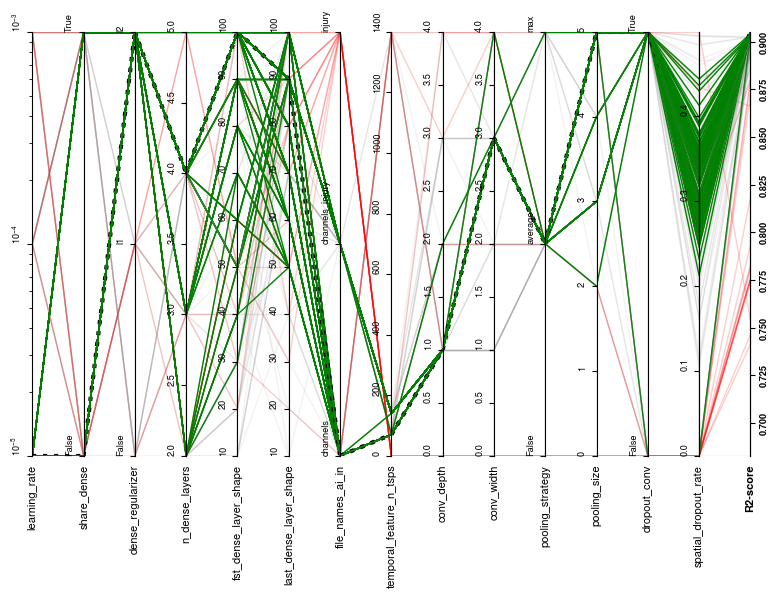

In [12]:
def alt_cat():
    trials = TRIALS.copy()

    dtypes = {
        "params_conv_depth": float,
        "params_conv_width": float,
        "params_dense_regularizer": str,
        "params_dropout_conv": bool,
        "params_file_names_ai_in": str,
        "params_fst_dense_layer_shape": int,
        "params_last_dense_layer_shape": int,
        "params_learning_rate": float,
        "params_n_dense_layers": int,
        "params_pooling_size": int,
        "params_pooling_strategy": str,
        "params_share_dense": bool,
        "params_spatial_dropout_rate": float,
        "params_temporal_feature_n_tsps": int,
    }
    for col, dtype in dtypes.items():
        trials[col] = trials[col].astype(dtype)
        if dtype == bool:
            trials[col] = trials[col].astype(str)
    trials.rename(columns={col: "_".join(col.split("_")[1:]) for col in trials.columns if col.startswith("params")}, inplace=True)
    trials.rename(columns={"value": "R2-score"}, inplace=True)

    col_ord = [
        "learning_rate",
        "share_dense",
        "dense_regularizer",
        "n_dense_layers",
        "fst_dense_layer_shape",
        "last_dense_layer_shape",
        "file_names_ai_in",
        "temporal_feature_n_tsps",
        "conv_depth",
        "conv_width",
        "pooling_strategy",
        "pooling_size",
        "dropout_conv",
        "spatial_dropout_rate",
        "R2-score",
    ]

    fig, ax = plot_parcoords(
        trials[col_ord].to_numpy(),
        labels=col_ord,
        figsize=(FULL_WIDTH, 1.3 * FULL_WIDTH),
        color_field=-1,
        # c_thres=[TRIALS["value"].nsmallest(20).to_list()[-1], TRIALS["value"].nlargest(20).to_list()[-1], TRIALS["value"].max()],
        c_thres=[TRIALS["value"].nsmallest(20).to_list()[-1], TRIALS["value"].max() - 2e-3, TRIALS["value"].max()],
        scale=["log"],
    )

    fig.savefig(FIG_DIR / "parcoords_cnn.pdf")


alt_cat()

2024-12-20 18:52:31,145     INFO  MainProcess  MainThread maxp pruned
2024-12-20 18:52:31,149     INFO  MainProcess  MainThread cmap pruned
2024-12-20 18:52:31,151     INFO  MainProcess  MainThread post pruned
2024-12-20 18:52:31,152     INFO  MainProcess  MainThread CFF  pruned
2024-12-20 18:52:31,155     INFO  MainProcess  MainThread GPOS pruned
2024-12-20 18:52:31,163     INFO  MainProcess  MainThread GSUB pruned
2024-12-20 18:52:31,164     INFO  MainProcess  MainThread Added .notdef to subset
2024-12-20 18:52:31,165     INFO  MainProcess  MainThread Closing glyph list over 'GSUB': 31 glyphs before
2024-12-20 18:52:31,166     INFO  MainProcess  MainThread Glyph names: ['.notdef', 'N', 'R', 'T', 'a', 'b', 'c', 'e', 'eight', 'f', 'five', 'h', 'hyphen', 'i', 'j', 'l', 'm', 'n', 'nine', 'o', 'one', 'period', 'r', 's', 'seven', 'space', 'two', 'u', 'underscore', 'y', 'zero']
2024-12-20 18:52:31,167     INFO  MainProcess  MainThread Glyph IDs:   [0, 29, 36, 44, 51, 52, 56, 57, 64, 65, 67,

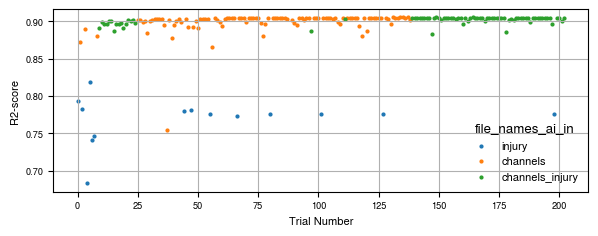

In [13]:
def plot_history(param="params_file_names_ai_in"):
    fig, ax = plt.subplots(figsize=(FULL_WIDTH, 0.4 * FULL_WIDTH))
    for conf in TRIALS[param].unique():
        ax.scatter(TRIALS[TRIALS[param].eq(conf)].index, TRIALS[TRIALS[param].eq(conf)]["value"], label=conf, s=4)
    ax.set_xlabel("Trial Number")
    ax.set_ylabel("R2-score")
    ax.grid()
    ax.legend(title=f"{'_'.join(param.split('_')[1:])}")
    fig.savefig(FIG_DIR / "r2_over_trials_{param}.pdf")


plot_history()

2024-12-20 18:52:31,724     INFO  MainProcess  MainThread maxp pruned
2024-12-20 18:52:31,728     INFO  MainProcess  MainThread cmap pruned
2024-12-20 18:52:31,729     INFO  MainProcess  MainThread post pruned
2024-12-20 18:52:31,731     INFO  MainProcess  MainThread CFF  pruned
2024-12-20 18:52:31,734     INFO  MainProcess  MainThread GPOS pruned
2024-12-20 18:52:31,741     INFO  MainProcess  MainThread GSUB pruned
2024-12-20 18:52:31,742     INFO  MainProcess  MainThread Added .notdef to subset
2024-12-20 18:52:31,742     INFO  MainProcess  MainThread Closing glyph list over 'GSUB': 35 glyphs before
2024-12-20 18:52:31,743     INFO  MainProcess  MainThread Glyph names: ['.notdef', 'F', 'N', 'R', 'T', 'a', 'b', 'c', 'd', 'e', 'eight', 'five', 'four', 'h', 'hyphen', 'i', 'l', 'm', 'n', 'nine', 'o', 'one', 'p', 'period', 'r', 's', 'seven', 'space', 't', 'three', 'two', 'u', 'underscore', 'v', 'zero']
2024-12-20 18:52:31,744     INFO  MainProcess  MainThread Glyph IDs:   [0, 29, 36, 44, 

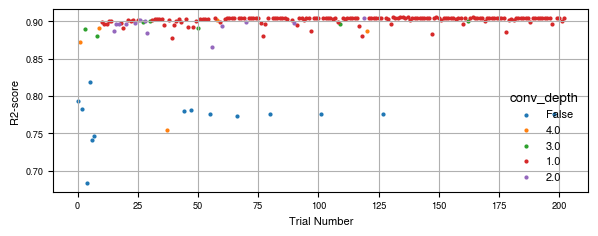

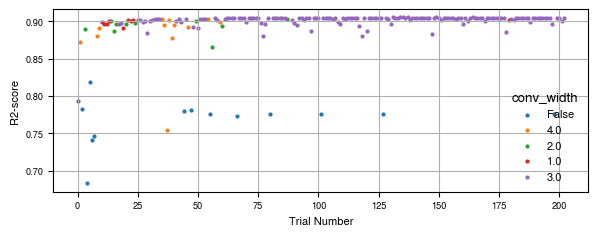

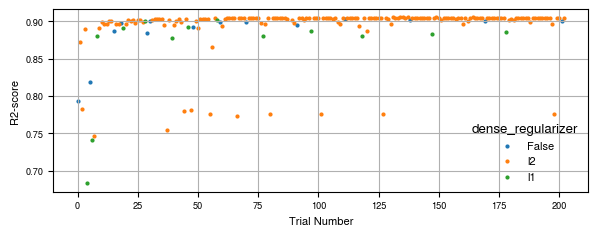

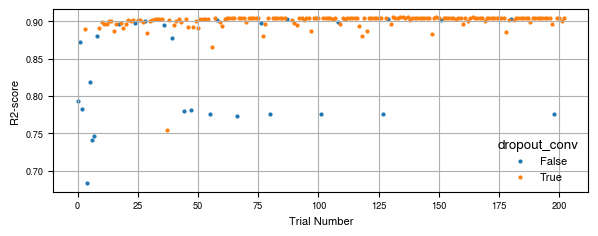

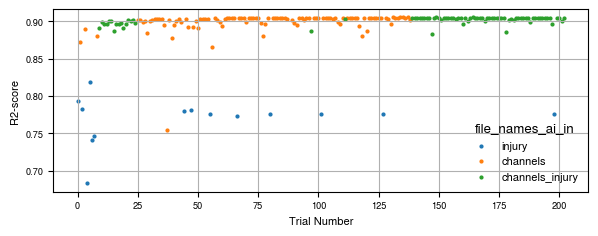

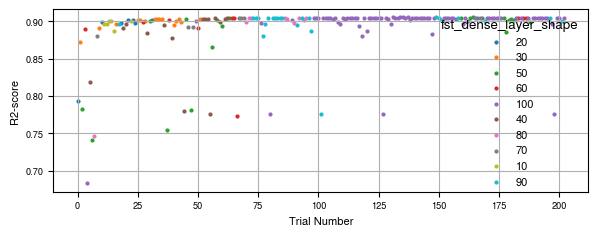

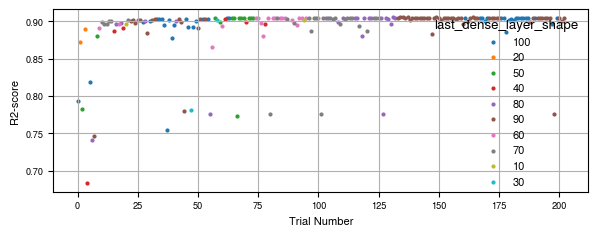

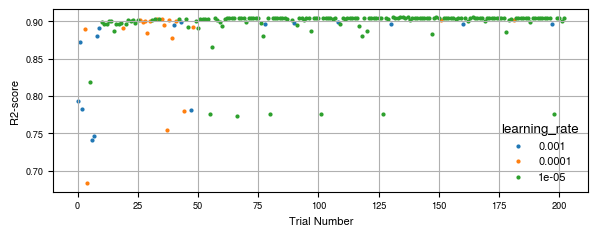

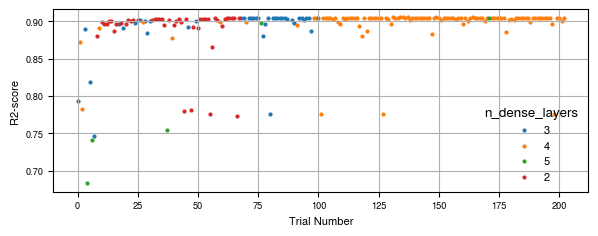

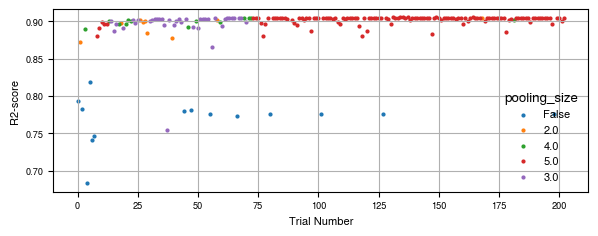

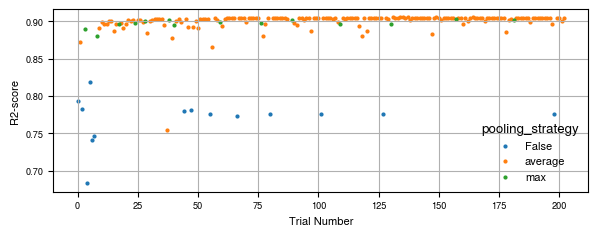

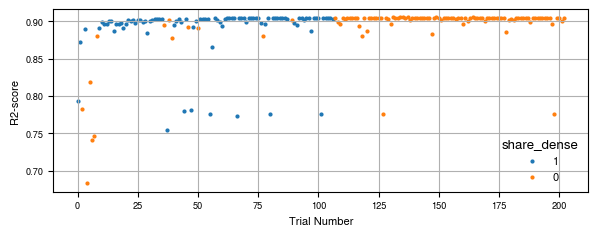

/root/py_projects/aihiii/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


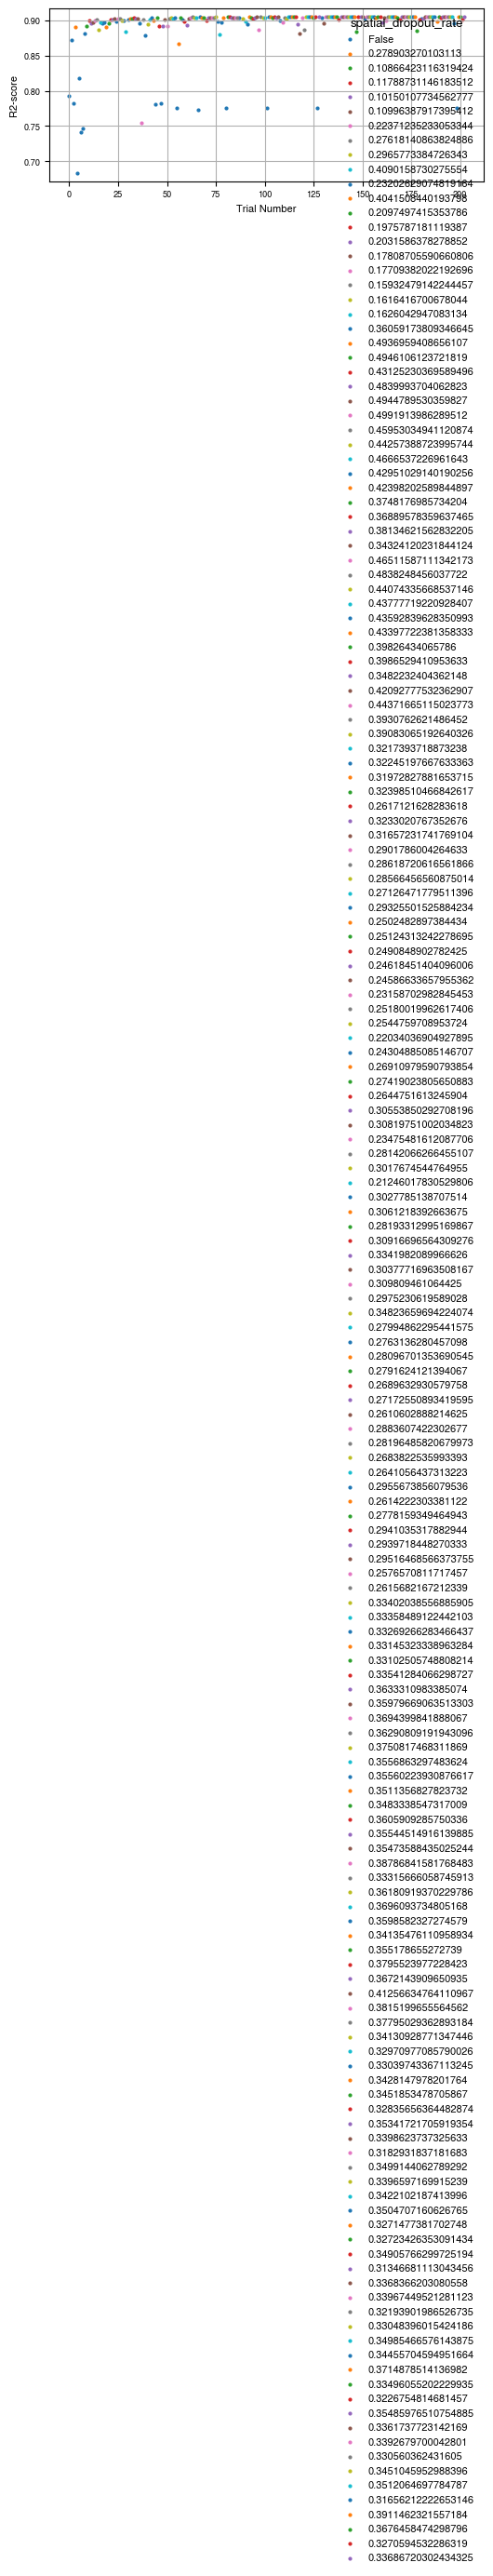

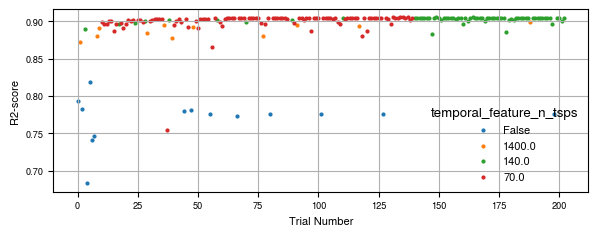

In [14]:
_ = [plot_history(param) for param in TRIALS.columns if param.startswith("params") and param not in IGNORE]

/tmp/ipykernel_2487477/3995729394.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[f"data_{i}"].scatter(db[y_true_str], db[y_pred_str], alpha=0.5, s=2, c=COLORS[4], marker=".")
/tmp/ipykernel_2487477/3995729394.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[f"data_{i}"].scatter(db[y_true_str], db[y_pred_str], alpha=0.5, s=2, c=COLORS[4], marker=".")
2024-12-20 19:43:32,586     INFO  MainProcess  MainThread ma

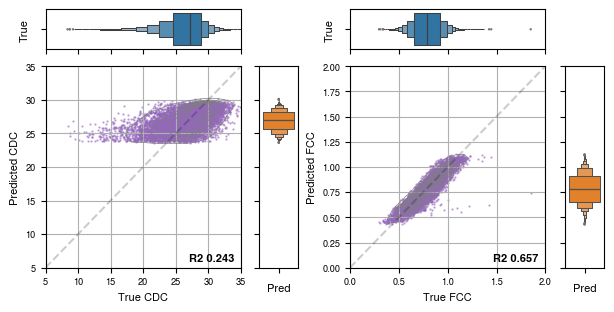

In [53]:
def plots_analyse_5(exp_path: Path, inj_crits: List[str], lims: List[List[int]] = [[5, 35], [0, 2]]):
    fields = [["letter_true_0", "empty_0", "letter_true_1", "empty_1"], ["data_0", "letter_pred_0", "data_1", "letter_pred_1"]]
    fig, ax = plt.subplot_mosaic(mosaic=fields, height_ratios=[0.2, 1], width_ratios=[*[1, 0.2] * 2], layout="constrained")
    renamer = {"Chest_Deflection": "CDC", "Femur_Fz_Max_Compression": "FCC", "Head_a3ms": "HAC$_3$", "Chest_a3ms": "CAC$_3$"}

    for i, inj_crit in enumerate(inj_crits):
        y_true = pd.read_parquet(exp_path / "y_true_Test_Fold-1.parquet", columns=[inj_crit])
        y_pred = pd.read_parquet(exp_path / "y_pred_Test_Fold-1.parquet", columns=[inj_crit])
        s_score = pd.read_parquet(exp_path / "sample_score.parquet", columns=[inj_crit])
        y_true_str, y_pred_str = f"True {renamer[inj_crit]}", f"Predicted {renamer[inj_crit]}"
        db = pd.DataFrame(
            {
                y_true_str: y_true.loc[y_true.index, inj_crit].values,
                y_pred_str: y_pred.loc[y_true.index, inj_crit].values,
                "Sample Score": s_score.loc[y_true.index, inj_crit].values,
            }
        )

        ax[f"data_{i}"].scatter(db[y_true_str], db[y_pred_str], alpha=0.5, s=2, c=COLORS[4], marker=".")
        sns.kdeplot(
            data=db,
            x=y_true_str,
            y=y_pred_str,
            ax=ax[f"data_{i}"],
            color=COLORS[-3],
            linewidths=0.5,
        )
        ax[f"data_{i}"].plot(
            lims[i],
            lims[i],
            color="black",
            linestyle="--",
            alpha=0.2,
        )
        # ax.set_title(f"Maximum {REL_COLS[inj_crit].replace(' [mm]', '')}")
        ax[f"data_{i}"].set_xlim(lims[i])
        ax[f"data_{i}"].set_ylim(lims[i])
        ax[f"data_{i}"].grid()
        ax[f"data_{i}"].text(
            0.85,
            0.05,
            f"R2 {r2_score(db[y_true_str], db[y_pred_str]):.3f}",
            horizontalalignment="center",
            verticalalignment="center",
            transform=ax[f"data_{i}"].transAxes,
            fontweight="bold",
        )

        sns.boxenplot(x=y_true[inj_crit], ax=ax[f"letter_true_{i}"], color=COLORS[0], flier_kws={"s": 0.5})
        ax[f"letter_true_{i}"].set_xlim(lims[i])
        ax[f"letter_true_{i}"].set_xlabel("")
        ax[f"letter_true_{i}"].set_ylabel("True")
        ax[f"letter_true_{i}"].set_xticklabels([])

        sns.boxenplot(y=y_pred[inj_crit], ax=ax[f"letter_pred_{i}"], color=COLORS[1], flier_kws={"s": 0.5})
        ax[f"letter_pred_{i}"].set_ylim(lims[i])
        ax[f"letter_pred_{i}"].set_ylabel("")
        ax[f"letter_pred_{i}"].set_xlabel("Pred")
        ax[f"letter_pred_{i}"].set_yticklabels([])

        ax[f"empty_{i}"].axis("off")

    fig.set_figwidth(FULL_WIDTH)
    fig.set_figheight(0.5 * FULL_WIDTH)
    fig.savefig(FIG_DIR / f"inj_crits_{inj_crits[0]}_{inj_crits[1]}.pdf")

plots_analyse_5(
    exp_path=Path("experiments")
    / "2024-12-20-13-40-40_pure_cnn_single_full_output_05HIII_injury_criteria_from_doe_sobol_20240705_194200",
    inj_crits=["Chest_Deflection", "Femur_Fz_Max_Compression"],
)

/tmp/ipykernel_2487477/3995729394.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[f"data_{i}"].scatter(db[y_true_str], db[y_pred_str], alpha=0.5, s=2, c=COLORS[4], marker=".")
/tmp/ipykernel_2487477/3995729394.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[f"data_{i}"].scatter(db[y_true_str], db[y_pred_str], alpha=0.5, s=2, c=COLORS[4], marker=".")
2024-12-20 19:43:40,765     INFO  MainProcess  MainThread ma

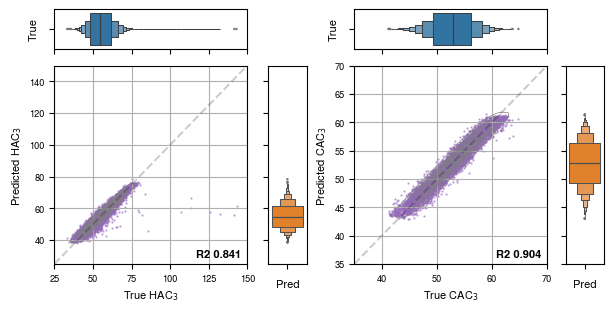

In [54]:
plots_analyse_5(
    exp_path=Path("experiments")
    / "2024-12-20-13-40-40_pure_cnn_single_full_output_05HIII_injury_criteria_from_doe_sobol_20240705_194200",
    inj_crits=["Head_a3ms", "Chest_a3ms"],
    lims=[[25, 150], [35, 70]],
)

/tmp/ipykernel_669076/3086886313.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[f"data_{i}"].scatter(db[y_true_str], db[y_pred_str], alpha=0.5, s=2, c=COLORS[4], marker=".")
/tmp/ipykernel_669076/3086886313.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[f"data_{i}"].scatter(db[y_true_str], db[y_pred_str], alpha=0.5, s=2, c=COLORS[4], marker=".")
/tmp/ipykernel_669076/3086886313.py:19: UserWarning: *c* argum

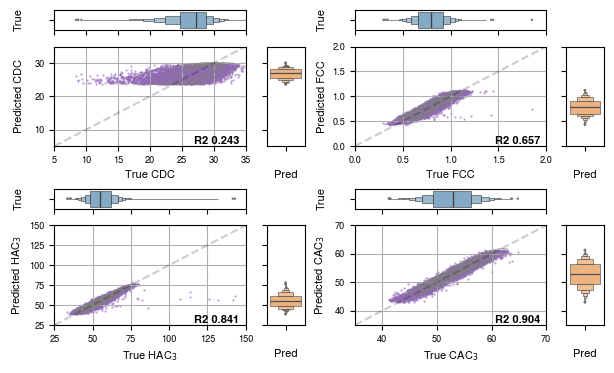

In [8]:
def plots2_analyse_5(exp_path: Path, inj_crits: List[str], lims: List[List[int]] = [[5, 35], [0, 2], [25, 150], [35, 70]]):
    fields = [["letter_true_0", "empty_0", "letter_true_1", "empty_1"], ["data_0", "letter_pred_0", "data_1", "letter_pred_1"], ["letter_true_2", "empty_2", "letter_true_3", "empty_3"], ["data_2", "letter_pred_2", "data_3", "letter_pred_3"]]
    fig, ax = plt.subplot_mosaic(mosaic=fields, height_ratios=[*[0.2, 1]*2], width_ratios=[*[1, 0.2] * 2], layout="constrained")
    renamer = {"Chest_Deflection": "CDC", "Femur_Fz_Max_Compression": "FCC", "Head_a3ms": "HAC$_3$", "Chest_a3ms": "CAC$_3$"}

    for i, inj_crit in enumerate(inj_crits):
        y_true = pd.read_parquet(exp_path / "y_true_Test_Fold-1.parquet", columns=[inj_crit])
        y_pred = pd.read_parquet(exp_path / "y_pred_Test_Fold-1.parquet", columns=[inj_crit])
        s_score = pd.read_parquet(exp_path / "sample_score.parquet", columns=[inj_crit])
        y_true_str, y_pred_str = f"True {renamer[inj_crit]}", f"Predicted {renamer[inj_crit]}"
        db = pd.DataFrame(
            {
                y_true_str: y_true.loc[y_true.index, inj_crit].values,
                y_pred_str: y_pred.loc[y_true.index, inj_crit].values,
                "Sample Score": s_score.loc[y_true.index, inj_crit].values,
            }
        )

        ax[f"data_{i}"].scatter(db[y_true_str], db[y_pred_str], alpha=0.5, s=2, c=COLORS[4], marker=".")
        sns.kdeplot(
            data=db,
            x=y_true_str,
            y=y_pred_str,
            ax=ax[f"data_{i}"],
            color=COLORS[-3],
            linewidths=0.5,
            
        )
        ax[f"data_{i}"].plot(
            lims[i],
            lims[i],
            color="black",
            linestyle="--",
            alpha=0.2,
        )
        # ax.set_title(f"Maximum {REL_COLS[inj_crit].replace(' [mm]', '')}")
        ax[f"data_{i}"].set_xlim(lims[i])
        ax[f"data_{i}"].set_ylim(lims[i])
        ax[f"data_{i}"].grid()
        ax[f"data_{i}"].text(
            0.85,
            0.05,
            f"R2 {r2_score(db[y_true_str], db[y_pred_str]):.3f}",
            horizontalalignment="center",
            verticalalignment="center",
            transform=ax[f"data_{i}"].transAxes,
            fontweight="bold",
        )

        sns.boxenplot(x=y_true[inj_crit], ax=ax[f"letter_true_{i}"], color=COLORS[0], flier_kws={"s": 0.5},alpha=0.6,)
        ax[f"letter_true_{i}"].set_xlim(lims[i])
        ax[f"letter_true_{i}"].set_xlabel("")
        ax[f"letter_true_{i}"].set_ylabel("True")
        ax[f"letter_true_{i}"].set_xticklabels([])

        sns.boxenplot(y=y_pred[inj_crit], ax=ax[f"letter_pred_{i}"], color=COLORS[1], flier_kws={"s": 0.5},alpha=0.6,)
        ax[f"letter_pred_{i}"].set_ylim(lims[i])
        ax[f"letter_pred_{i}"].set_ylabel("")
        ax[f"letter_pred_{i}"].set_xlabel("Pred")
        ax[f"letter_pred_{i}"].set_yticklabels([])

        ax[f"empty_{i}"].axis("off")

    fig.align_ylabels(list(ax.values()))
    fig.align_xlabels(list(ax.values()))
    fig.set_figwidth(FULL_WIDTH)
    fig.set_figheight(0.6 * FULL_WIDTH)
    fig.savefig(FIG_DIR / f"inj_crits_{'_'.join(inj_crits)}.pdf")


plots2_analyse_5(
    exp_path=Path("experiments")
    / "2024-12-20-13-40-40_pure_cnn_single_full_output_05HIII_injury_criteria_from_doe_sobol_20240705_194200",
    inj_crits=["Chest_Deflection", "Femur_Fz_Max_Compression", "Head_a3ms", "Chest_a3ms"],
)